In [20]:
from tqdm import  *
import numpy as np
from sklearn import model_selection, datasets, linear_model, preprocessing, metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## Зависимость ошибки линейной регрессии от числа параметров модели

### Описание задания

Исследуем зависимость ошибки линейной регрессии на тестовой выборке от количества параметров модели. Для этого воспользуемся сгенерированной синтетической выборкой. Сделаем значимыми примерно $\frac{2}{3}$ параметров. 


В каждом случае, обучая модель, будем считать MSE на обучающей и тестовой выборке, строя несколько случайных разбиений. В конечном итоге будем иметь также дисперсию ошибки, а значит сможем построить доверительный интервал.

### Исходный код

In [22]:
X, y = datasets.make_regression(
    n_samples = 5000,
    n_features = 300,
    n_informative = 200,
    noise = 2)

X_train, X_test, y_train, y_test = train_test_split\
            (X, y, test_size=500, random_state=17)
        
results = []  # список пар (вектор использованных признаков, 
                            # значение функции потерь)
features_count = X.shape[1]
        
for i in range(1, features_count):
    subset = [j == '1' for j in ('1'*i + '0'*(features_count-i))]
            
    model = linear_model.LinearRegression(dict())
    model.fit(X_train[:, subset], y_train)
            
    score = mean_squared_error(y_test, model.predict(X_test[:, subset]))  
    
    results.append([i, score])

300


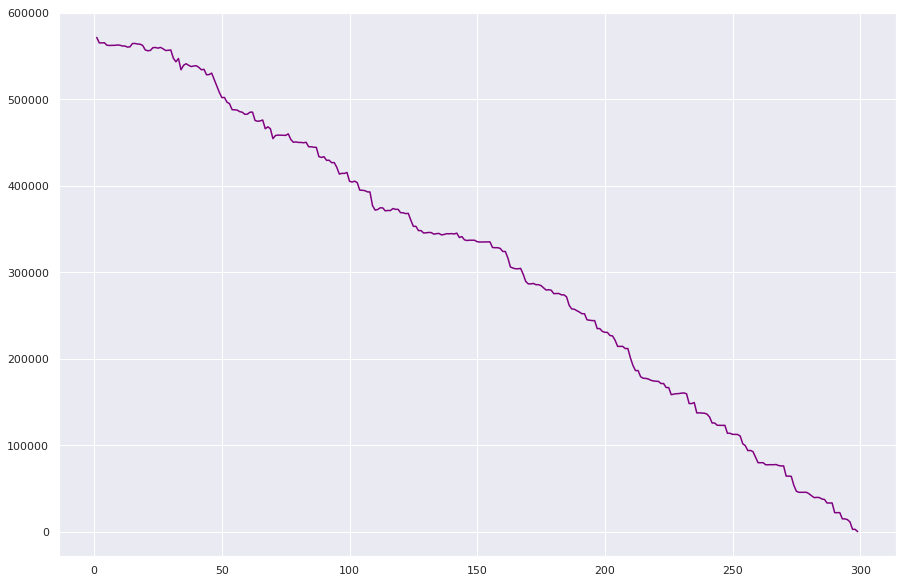

In [23]:
results = np.array(results).T
plt.figure(figsize=(15,10))
plt.plot(results[0], results[1], color='purple')
plt.show()

**Вывод:**

С увеличением количества признаков качество модели улучшается. На графике есть различные неровности, вызванные, вероятно, тем, что в выборке присутствуют неинформативные признаки.